## Modelo de consumos 2016 - 2018

- Sklearn
- Python 3.6
- Spark


> https://mapr.com/blog/predicting-airbnb-listing-prices-scikit-learn-and-apache-spark/

https://www.kdnuggets.com/2016/01/python-data-science-pandas-spark-dataframe-differences.html

https://dataplatform.cloud.ibm.com/analytics/notebooks/4607bb0a-2860-4ae6-82f4-5f9e8f9f5d46/view?access_token=9718e4e6c8939f0372169cf85ba67167b7d5c51aaf6c4d5a899ad0f663d818b8
 





In [1]:
#from sklearn import svm, grid_search, datasets
#from spark_sklearn import GridSearchCV 
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import GridSearchCV
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import math
%matplotlib inline

In [27]:
file_consumos = "consumosValpoMin.csv"
file_temp = "tempvalp.csv"

In [173]:
df = pd.read_csv(file_consumos , sep=';' ,  encoding='utf-8' , decimal=',') #decimal para leer las comas

In [174]:
df_temp = pd.read_csv(file_temp , sep=';' ,  encoding='utf-8' , decimal=',') #decimal para leer las comas

In [175]:
df.info()

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308124 entries, 0 to 308123
Data columns (total 8 columns):
COMUNA            308124 non-null object
PLAN_COMERCIAL    308124 non-null object
CATEGORIA         308124 non-null object
SUBCATEGORIA      308124 non-null object
PRODUCT_ID        308124 non-null int64
AÑO               308124 non-null int64
MES               308124 non-null int64
CONSUMO           308124 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.8+ MB


,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO
308119,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,5,10444.8
308120,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,4,10447.8
308121,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,3,11536.9
308122,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,2,11414.8
308123,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,1,10716.8


 Cuatro variables categóricas y cuatro numéricas

In [176]:
#df.describe() # para variables numéricas 

## Limpieza de datos 


#### Valores ausentes :)


In [177]:
print('NULL VALUES !')
df.isnull().sum()

NULL VALUES !


COMUNA            0
PLAN_COMERCIAL    0
CATEGORIA         0
SUBCATEGORIA      0
PRODUCT_ID        0
AÑO               0
MES               0
CONSUMO           0
dtype: int64

#### Eliminar valores null 

In [178]:
#no es necesario
#slr_df = slr_df.dropna()
#slr_df.isnull().sum()

#### Elimiar filas con consumos menores =  0  ,  14000~

In [179]:
#df = 308124 filas
## 293667 
df = df[df.CONSUMO > 0] 

####  Correlograma

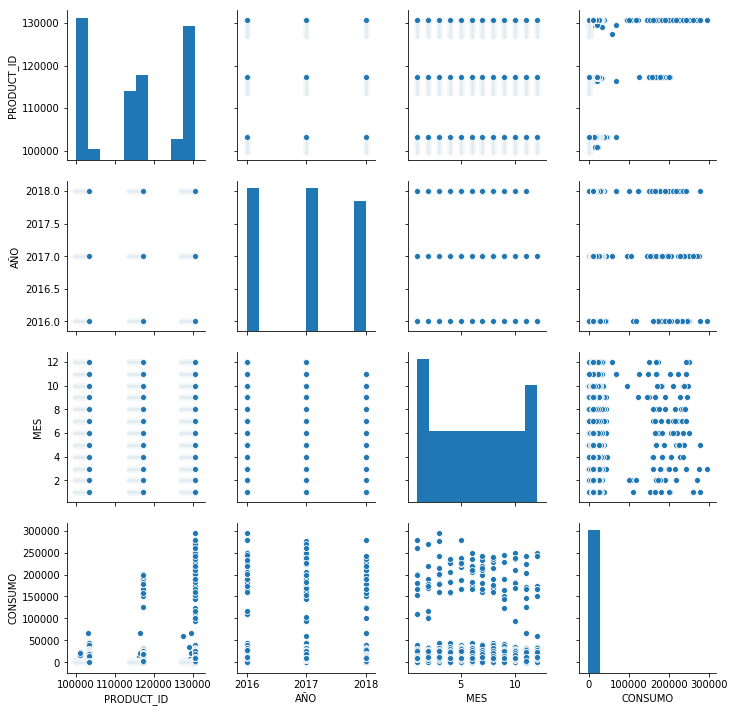

In [26]:
sns.pairplot(df)

In [180]:
df_temp.info()

df_temp.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
year    35 non-null int64
mes     35 non-null int64
max     35 non-null float64
avg     35 non-null float64
min     35 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


,year,mes,max,avg,min
30,2018,7,14.3,9.1,6.2
31,2018,8,15.7,9.9,6.6
32,2018,9,18.7,12.3,8.4
33,2018,10,19.0,12.4,8.2
34,2018,11,23.8,16.0,10.3


In [138]:
#df_temp.describe()

In [35]:
#df_temp.head()

,year,mes,max,avg,min
0,2016,1,23.7,18.0,13.8
1,2016,2,23.5,17.0,12.8
2,2016,3,19.2,14.8,12.3
3,2016,4,18.6,13.7,11.1
4,2016,5,17.2,12.8,10.6


## Unión con temperaturas de valparaiso

In [181]:
df.columns
df = pd.merge(df, df_temp,  how='left', left_on=['AÑO','MES'], right_on = ['year','mes'])[['COMUNA', 'PLAN_COMERCIAL', 'CATEGORIA', 'SUBCATEGORIA', 'PRODUCT_ID', 'AÑO', 'MES', 'CONSUMO' , 'max', 'avg', 'min']]
  

In [182]:
df.head()

,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO,max,avg,min
0,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,12,3215.0,22.7,16.5,11.8
1,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,11,3197.0,22.8,15.8,10.6
2,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,10,3658.0,19.6,13.4,9.3
3,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,9,3889.0,17.3,11.4,7.9
4,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,8,4367.0,17.8,11.3,7.7


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293667 entries, 0 to 293666
Data columns (total 11 columns):
COMUNA            293667 non-null object
PLAN_COMERCIAL    293667 non-null object
CATEGORIA         293667 non-null object
SUBCATEGORIA      293667 non-null object
PRODUCT_ID        293667 non-null int64
AÑO               293667 non-null int64
MES               293667 non-null int64
CONSUMO           293667 non-null float64
max               293667 non-null float64
avg               293667 non-null float64
min               293667 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 26.9+ MB


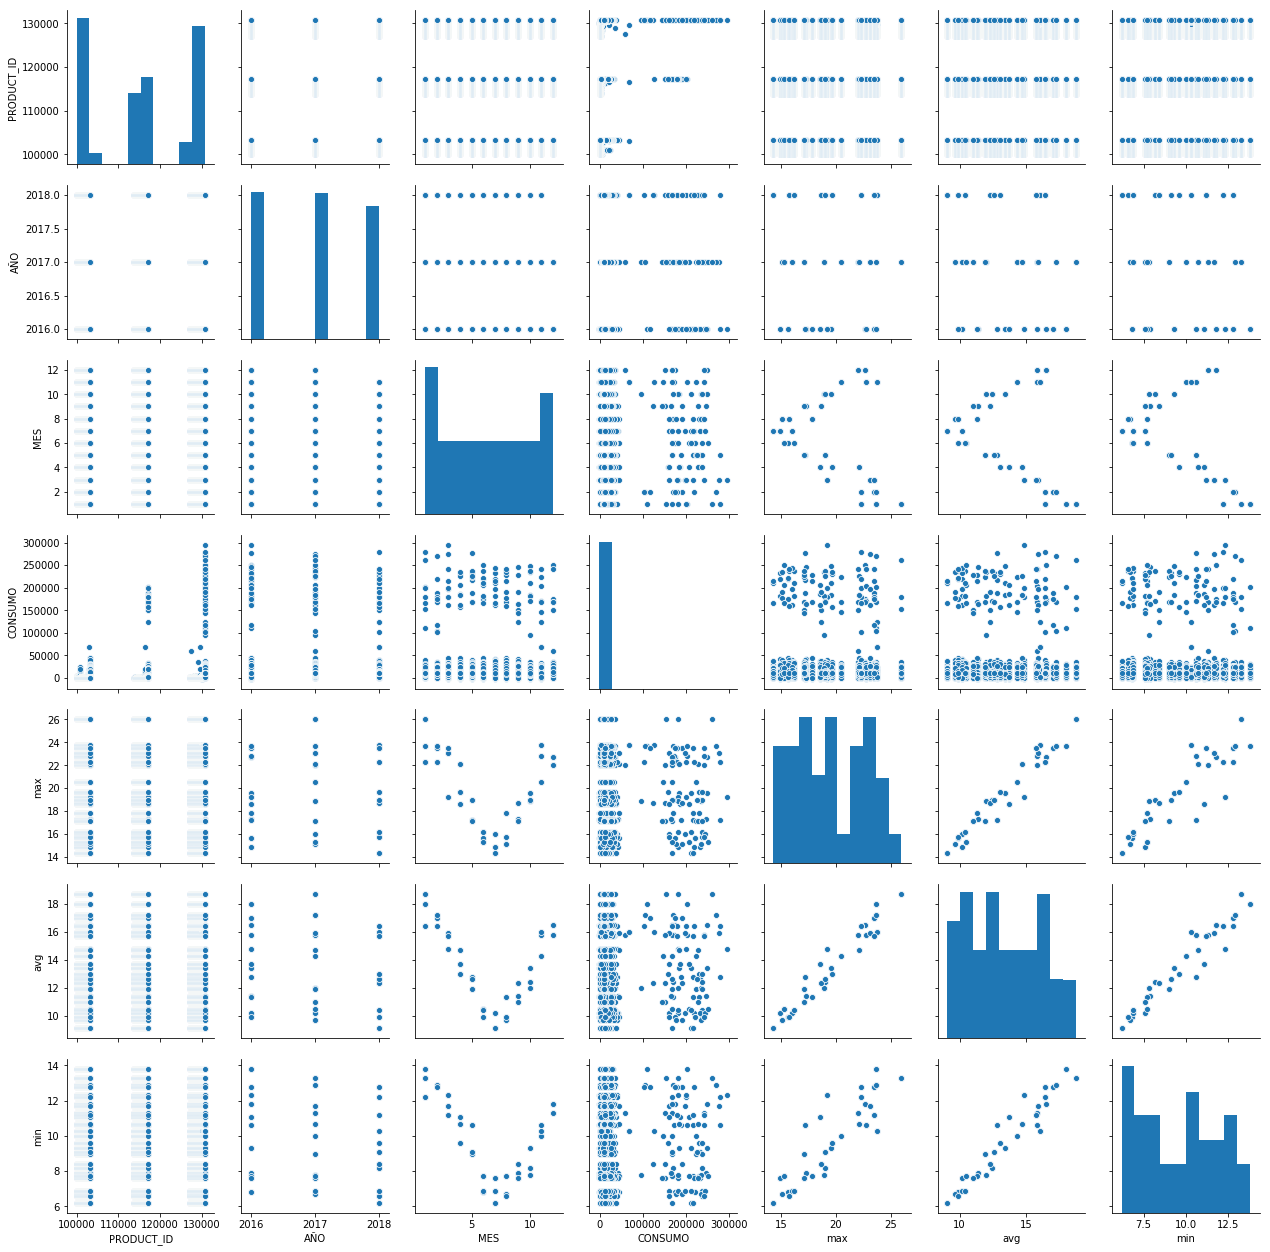

In [88]:
sns.pairplot(df[['COMUNA', 'PLAN_COMERCIAL', 'CATEGORIA', 'SUBCATEGORIA', 'PRODUCT_ID', 'AÑO', 'MES', 'CONSUMO' , 'max', 'avg', 'min']])

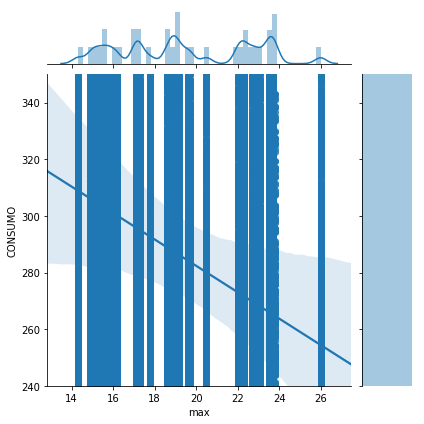

In [69]:
sns.jointplot(data = df, x= 'max', y ='CONSUMO' , kind="reg" , ylim=(240,350))   

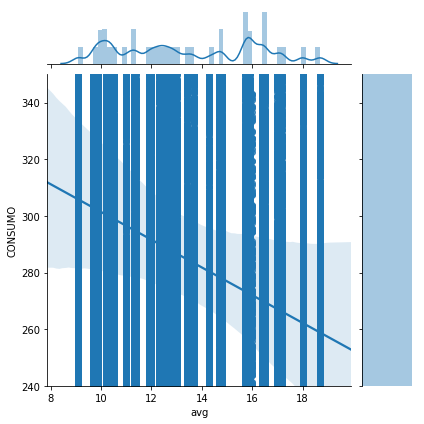

In [70]:
sns.jointplot(data = df, x= 'avg', y ='CONSUMO' , kind="reg" ,ylim=(240,350))   

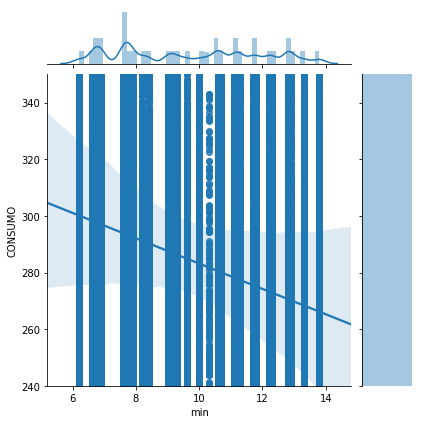

In [71]:
sns.jointplot(data = df, x= 'min', y ='CONSUMO', kind="reg", ylim=(240,350))   

## Vector encodig
 'COMUNA', 'PLAN_COMERCIAL', 'CATEGORIA', 'SUBCATEGORIA', 'PRODUCT_ID'
https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [197]:
hot_com= pd.get_dummies(df['COMUNA']) 
hot_com.head()

,117 - VALPARAÍSO
0,1
1,1
2,1
3,1
4,1


In [198]:
hot_plan = pd.get_dummies(df['PLAN_COMERCIAL'])
hot_plan.head() 

,1 - BT-2 PACTADO,124 - AT - PLD PRECIO FIJO,22 - BT-2,55 - BT-1A,57 - BT-3,58 - BT-4.1,60 - BT-4.3,61 - AT-2,62 - AT-3,65 - AT-4.3,72 - BOMBEROS BT-1A,79 - EMPLEADOS ACTIVOS Y JUBILADOS,83 - EMPLEADOS PASIVOS
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [199]:
hot_cat = pd.get_dummies(df['CATEGORIA'])
hot_cat.head() 

,1 - RESIDENCIAL,2 - COMERCIAL,3 - INDUSTRIAL,4 - AGRÍCOLA,5 - FISCAL,6 - MUNICIPAL,8 - UTILIDAD PÚBLICA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [200]:
hot_subcat = pd.get_dummies(df['SUBCATEGORIA'])
hot_subcat.head()

,1 - ALUMBRADO PÚBLICO,1 - BOMBEROS,1 - CAMPAMENTO,10 - SERVICIOS MUNICIPALES,2 - Fábrica,3 - CASA - HABITACIÓN,3 - Servicios fiscales,4 - Corp. municipal de educación,4 - PRODUCCIÓN AGRÍCOLA,5 - OFICINAS,6 - OFICINAS,7 - CATASTRO
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [201]:
hot_año= pd.get_dummies(df['AÑO'])
hot_año.head()

,2016,2017,2018
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [202]:
hot_mes= pd.get_dummies(df['MES'])
hot_mes.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [207]:
final = pd.concat([  hot_com , hot_plan , hot_cat , hot_subcat,hot_año , hot_mes , df[['CONSUMO' , 'max','avg','min']] ,  ] , axis=1)
final.columns

Index([                  '117 - VALPARAÍSO',
                         '1 - BT-2 PACTADO',
               '124 - AT - PLD PRECIO FIJO',
                                '22 - BT-2',
                               '55 - BT-1A',
                                '57 - BT-3',
                              '58 - BT-4.1',
                              '60 - BT-4.3',
                                '61 - AT-2',
                                '62 - AT-3',
                              '65 - AT-4.3',
                      '72 - BOMBEROS BT-1A',
       '79 - EMPLEADOS ACTIVOS Y JUBILADOS',
                   '83 - EMPLEADOS PASIVOS',
                          '1 - RESIDENCIAL',
                            '2 - COMERCIAL',
                           '3 - INDUSTRIAL',
                             '4 - AGRÍCOLA',
                               '5 - FISCAL',
                            '6 - MUNICIPAL',
                     '8 - UTILIDAD PÚBLICA',
                    '1 - ALUMBRADO PÚBLICO',
          

In [209]:
sns.pairplot(final)

In [192]:
df.info()
        
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293667 entries, 0 to 293666
Data columns (total 11 columns):
COMUNA            293667 non-null object
PLAN_COMERCIAL    293667 non-null object
CATEGORIA         293667 non-null object
SUBCATEGORIA      293667 non-null object
PRODUCT_ID        293667 non-null int64
AÑO               293667 non-null int64
MES               293667 non-null int64
CONSUMO           293667 non-null float64
max               293667 non-null float64
avg               293667 non-null float64
min               293667 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 26.9+ MB


,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO,max,avg,min
0,0,0,11,9700,23,26,23,0,0,5,0
1,0,0,10,9695,24,22,17,0,0,5,0
2,0,0,9,9864,17,16,13,0,0,5,0
3,0,0,8,9949,10,8,8,0,0,5,0
4,0,0,7,10064,11,7,6,0,0,5,0
5,0,0,6,10129,1,3,5,0,0,5,0
6,0,0,5,10090,4,2,3,0,0,5,0
7,0,0,4,10108,9,14,17,0,0,5,0
8,0,0,3,9948,12,17,19,0,0,5,0
9,0,1,11,9700,20,22,21,0,0,5,0


In [168]:
##guardamos el diccionario
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [169]:
# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
df.apply(lambda x: d[x.name].transform(x))

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\prepro

,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO,max,avg,min
0,0,0,11,9700,23,26,23,0,0,5,0
1,0,0,10,9695,24,22,17,0,0,5,0
2,0,0,9,9864,17,16,13,0,0,5,0
3,0,0,8,9949,10,8,8,0,0,5,0
4,0,0,7,10064,11,7,6,0,0,5,0
5,0,0,6,10129,1,3,5,0,0,5,0
6,0,0,5,10090,4,2,3,0,0,5,0
7,0,0,4,10108,9,14,17,0,0,5,0
8,0,0,3,9948,12,17,19,0,0,5,0
9,0,1,11,9700,20,22,21,0,0,5,0


In [170]:
df

,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO,max,avg,min
0,100000,2016,12,3215.0,22.7,16.5,11.8,0,0,5,0
1,100000,2016,11,3197.0,22.8,15.8,10.6,0,0,5,0
2,100000,2016,10,3658.0,19.6,13.4,9.3,0,0,5,0
3,100000,2016,9,3889.0,17.3,11.4,7.9,0,0,5,0
4,100000,2016,8,4367.0,17.8,11.3,7.7,0,0,5,0
5,100000,2016,7,4644.0,14.9,10.2,7.6,0,0,5,0
6,100000,2016,6,4494.0,15.6,9.9,6.8,0,0,5,0
7,100000,2016,5,4557.0,17.2,12.8,10.6,0,0,5,0
8,100000,2016,4,3878.0,18.6,13.7,11.1,0,0,5,0
9,100000,2017,12,3215.0,22.0,15.8,11.3,0,0,5,0


 ## Relación de variables  

          CONSUMO       max       avg       min
CONSUMO  1.000000 -0.003930 -0.003495 -0.002639
max     -0.003930  1.000000  0.970162  0.880720
avg     -0.003495  0.970162  1.000000  0.962808
min     -0.002639  0.880720  0.962808  1.000000


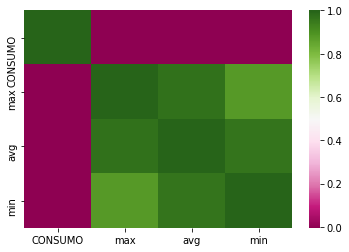

In [98]:
matrix_coor = df[['CONSUMO' , 'max', 'avg', 'min']].corr(method='pearson' ) #‘pearson’, ‘kendall’, ‘spearman’
print(matrix_coor)
sns.heatmap(matrix_coor, cmap="PiYG") 

## Estandarización de datos  

In [106]:
""" 
df_s = df.copy()

for col in df.columns:
    v_std = df[col].std()
    v_mean = df[col].mean()
    df_s[col] = (df_s[col] - v_mean) / v_std
"""

' \ndf_s = df.copy()\n\nfor col in df.columns:\n    v_std = df[col].std()\n    v_mean = df[col].mean()\n    df_s[col] = (df_s[col] - v_mean) / v_std\n'

## Random Forest

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train , Y_train , x_test , y_test = train_test_split( dataframe , test_size=.2 , random_state=42 )

In [ ]:
dt = DesDecisionTreeClassifier( max_deph=2 , random_state=1 )

In [ ]:
df.fit( X_train , y_train )

In [ ]:
y_estimados = dt.predict( X_test )

In [ ]:
acurracy_score(y_test, y_estimados)

In [112]:
arreglox = data[data.columns[:-4]].values
arregloy = data[data.columns[-4]].values

In [113]:
arreglox

array([['117 - VALPARAÍSO', '1 - BT-2 PACTADO', '6 - MUNICIPAL', ...,
        100000, 2016, 12],
       ['117 - VALPARAÍSO', '1 - BT-2 PACTADO', '6 - MUNICIPAL', ...,
        100000, 2016, 11],
       ['117 - VALPARAÍSO', '1 - BT-2 PACTADO', '6 - MUNICIPAL', ...,
        100000, 2016, 10],
       ...,
       ['117 - VALPARAÍSO', '65 - AT-4.3', '3 - INDUSTRIAL', ..., 130680,
        2018, 3],
       ['117 - VALPARAÍSO', '65 - AT-4.3', '3 - INDUSTRIAL', ..., 130680,
        2018, 2],
       ['117 - VALPARAÍSO', '65 - AT-4.3', '3 - INDUSTRIAL', ..., 130680,
        2018, 1]], dtype=object)

In [114]:
arregloy

array([ 3215. ,  3197. ,  3658. , ..., 11536.9, 11414.8, 10716.8])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(arreglox, arregloy)

In [116]:
reg.fit(X_train,y_train)

NameError: name 'reg' is not defined

,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO,max,avg,min
114782,117 - VALPARAÍSO,55 - BT-1A,1 - RESIDENCIAL,3 - CASA - HABITACIÓN,114249,2016,4,-15.8,18.6,13.7,11.1
288159,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,12,-1125.7,22.7,16.5,11.8
288160,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,11,-1535.0,22.8,15.8,10.6
288161,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,10,-1586.1,19.6,13.4,9.3
288162,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,9,-1535.0,17.3,11.4,7.9
288163,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,8,-1586.2,17.8,11.3,7.7
288164,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,7,-1586.1,14.9,10.2,7.6
288165,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,6,-1535.0,15.6,9.9,6.8
288166,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,5,-1586.1,17.2,12.8,10.6
288167,117 - VALPARAÍSO,55 - BT-1A,2 - COMERCIAL,6 - OFICINAS,129978,2016,4,-1535.0,18.6,13.7,11.1
